In [38]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

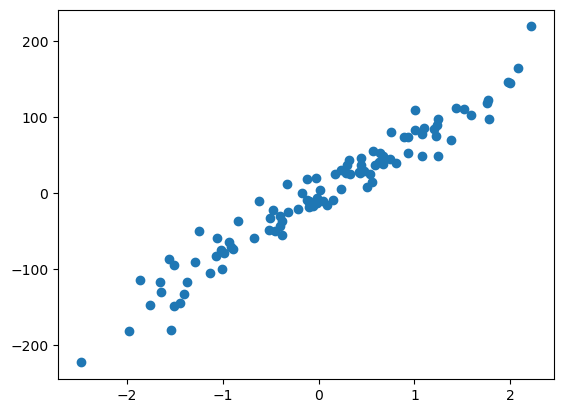

In [46]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20 )
plt.scatter(x, y)

# Creating our own GD Regression class

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [50]:
l_r = LinearRegression()
l_r.fit(x_train, y_train)
print(l_r.coef_)
print(l_r.intercept_)

[74.75219305]
-2.338232355031492


In [52]:
y_pred = l_r.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9407756087128777

In [82]:
class GDRegressor:
    def __init__(self, lr, epochs):
        self.m = 100
        self.b = -120
        self.lr = lr
        self.epochs = epochs
    def fit(self, x, y):
        for i in range(self.epochs):
            slope_b = -2*np.sum(y-self.m*x.ravel()-self.b)
            slope_m = -2*np.sum((y-self.m*x.ravel()-self.b)*x.ravel())
            step_size_b = self.lr*slope_b
            step_size_m = self.lr*slope_m
            self.b = self.b-step_size_b
            self.m = self.m-step_size_m
        print(self.b, self.m)
    def predict(self, x, y):
        plt.scatter(x, y)
        plt.plot(x, y_pred, color='red', label= 'b={%.2f}.format(b), m={%.2f}.format(m)')
        return (self.m*x+self.b)

In [84]:
gd = GDRegressor(0.001, 100)
# [74.75219305]
# -2.338232355031492

In [86]:
gd.fit(x_train, y_train)

-2.3382355218410398 74.75219244930234


0.9407756117502453

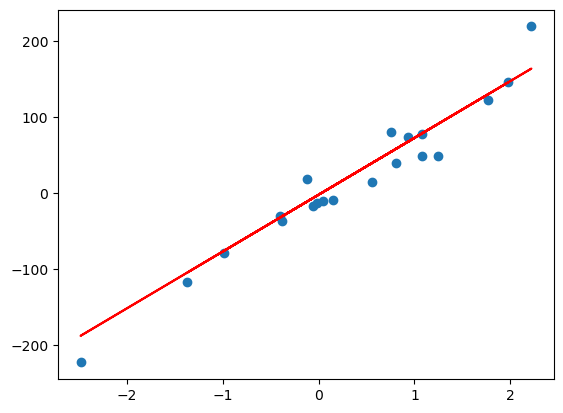

In [88]:
y_pred = gd.predict(x_test, y_test)
r2_score(y_test, y_pred)